In [18]:
import warnings
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

import plotly.express as px
%load_ext autoreload
%autoreload 2

layout = {
    'showlegend': True,
    'margin': {'b':10, 'l':20, 'r':20, 't':20},
    'font': {'size': 19},
    'xaxis': {'zerolinewidth': 2,  'zerolinecolor':'black', "color": "black"},
    'yaxis': {'zerolinewidth': 2, 'zerolinecolor':'black', "color": "black"},
    'template': 'plotly_white',
}
px.defaults.color_discrete_sequence = px.colors.qualitative.T10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
df = pd.read_csv("OIPE_2021_fullresults_extended.csv", sep=";", index_col=0)
df["battery_kwh_house"] = df["battery_kwh_house"].apply(lambda x: eval(x))
df["cluster_weight"] = df["cluster_weight"].apply(lambda x: eval(x))
df.tail(5).T

158  \
name                                                      country envelope   
self_sufficiency                                                     0.985   
pv_gwp                                                                1240   
battery_gwp                                                            158   
positive_feedback                                                      1.0   
cluster_file                           ../../data/clustered_data_DE.pickle   
cluster_weight                            [9.13, 7.1, 14.19, 11.01, 10.57]   
total_kgco2_house_year                                            -3895.08   
total_not_discounted_kgco2_house_year                              3786.65   
capex_kgco2_house_year                                             3774.49   
pv_kw_house                                                          40.09   
battery_kwh_house                                    [69.07, 66.98, 54.55]   

                                                                       159  \
name                                                      country envelope   
self_sufficiency                                                     0.995   
pv_gwp                                                                1240   
battery_gwp                                                            158   
positive_feedback                                                      1.0   
cluster_file                           ../../data/clustered_data_DE.pickle   
cluster_weight                            [9.13, 7.1, 14.19, 11.01, 10.57]   
total_kgco2_house_year                                            -4107.87   
total_not_discounted_kgco2_house_year                              4114.49   
capex_kgco2_house_year                                             4058.34   
pv_kw_house                                                          42.52   
battery_kwh_house                                    [76.19, 78.11, 64.76]   

                                                                       160  \
name                                                     positive feedback   
self_sufficiency                                                      0.95   
pv_gwp                                                                1040   
battery_gwp                                                            158   
positive_feedback                                                     0.97   
cluster_file                           ../../data/clustered_data_DE.pickle   
cluster_weight                            [9.13, 7.1, 14.19, 11.01, 10.57]   
total_kgco2_house_year                                            -3028.84   
total_not_discounted_kgco2_house_year                               2117.8   
capex_kgco2_house_year                                             2242.82   
pv_kw_house                                                          27.28   
battery_kwh_house                                    [44.16, 25.41, 29.29]   

                                                                       161  \
name                                                     positive feedback   
self_sufficiency                                                     0.985   
pv_gwp                                                                1040   
battery_gwp                                                            158   
positive_feedback                                                     0.97   
cluster_file                           ../../data/clustered_data_DE.pickle   
cluster_weight                            [9.13, 7.1, 14.19, 11.01, 10.57]   
total_kgco2_house_year                                            -3713.88   
total_not_discounted_kgco2_house_year                              2650.44   
capex_kgco2_house_year                                             2704.28   
pv_kw_house                                                          32.76   
battery_kwh_house                                     [53.62, 49.2, 31.94]   

           

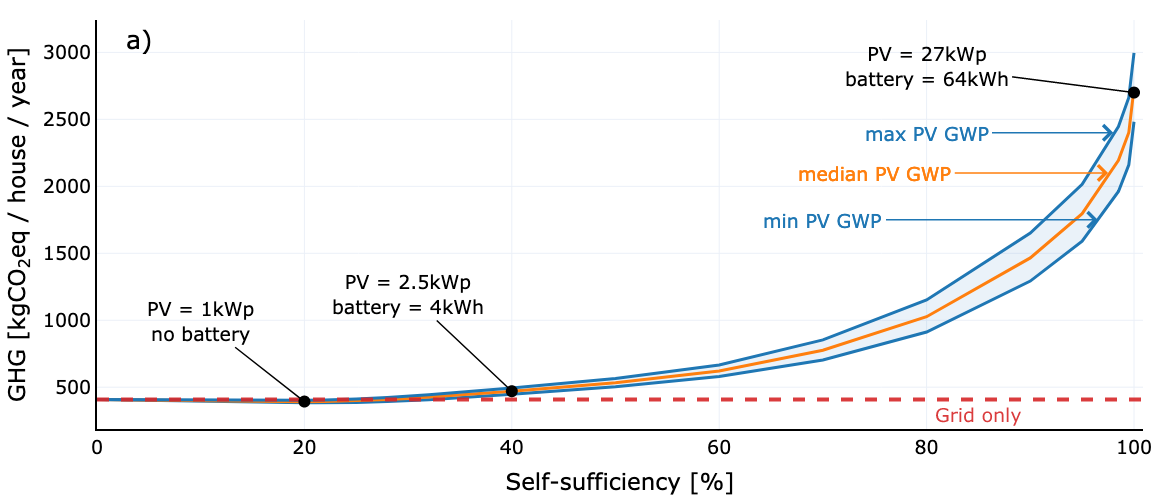

In [20]:
mask = (df.cluster_file == "../../data/clustered_data_FR.pickle") & (df.name == "country envelope")

graph = df[mask].copy()
graph["text"] = graph.apply(lambda x: f"{x.pv_kw_house}kWp/house — {round(np.mean(x.battery_kwh_house), 2)}kWh/house", axis=1)
graph = graph.sort_values(["pv_gwp", "self_sufficiency"])
graph["self_sufficiency"] *= 100

fig = px.line(graph, x="self_sufficiency", y="total_not_discounted_kgco2_house_year", color="pv_gwp", hover_data=["text"])

fig.data[0].update({"line": {"width": 3, "color": '#1f77b4'}, "opacity": 0.8})
fig.data[1].update({"line": {"width": 3, "color": '#ff7f0e'}, "opacity": 0.8, "fill": "tonexty", "fillcolor": "rgba(55, 128, 191, 0.1)"})
fig.data[-1].update({"line": {"width": 3, "color": '#1f77b4'}, "opacity": 0.8, "fill": "tonexty", "fillcolor": "rgba(55, 128, 191, 0.1)"})

fig.add_shape(
  type='line',
  xref="paper",
  x0=0, x1=1,
  y0=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  y1=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  line={'dash': 'dash', 'width': 4,
        'color': 'rgba(214, 39, 40, 0.9)'})

fig.add_annotation(
  x=5,
  y=3100,
  ay=0,
  text=f"""a)""",
  font={"color": "black", 'size': 25})

fig.add_annotation(
  x=86,
  y=300,
  ay=0,
  text=f"""Grid only""",
  font={"color": "rgba(214, 39, 40, 0.9)", 'size': 19})

fig.add_annotation(
  x=98,
  y=2400,
  ay=2400,
  text=f"""max PV GWP""",
  font={"color": "#1f77b4", 'size': 19},
  arrowhead=4, arrowsize=2, ax=80, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#1f77b4")

fig.add_annotation(
  x=97.5,
  y=2100,
  ay=2100,
  text=f"""median PV GWP""",
  font={"color": "#ff7f0e", 'size': 19},
  arrowhead=4, arrowsize=2, ax=75, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#ff7f0e")

fig.add_annotation(
  x=96.5,
  y=1750,
  ay=1750,
  text=f"""min PV GWP""",
  font={"color": "#1f77b4", 'size': 19},
  arrowhead=4, arrowsize=2, ax=70, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#1f77b4")

fig.add_annotation(
  x=20,
  y=393,
  ay=1000,
  text=f"""PV = 1kWp<br>no battery""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, ax=10, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_annotation(
  x=40,
  y=470,
  ay=1200,
  text=f"""PV = 2.5kWp<br>battery = 4kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, ax=30, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_annotation(
  x=100,
  y=2700,
  ax=80,
  ay=2900,  
  text=f"""PV = 27kWp<br>battery = 64kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.update_layout(
    layout,
    height=500,
    width=900,
    showlegend=False,
    xaxis={"title": "Self-sufficiency [%]",
           "showline": True, "linecolor": "black", "linewidth": 2},
    yaxis={"title": "GHG [kgCO<sub>2</sub>eq / house / year]",
           "showline": True, "linecolor": "black", "linewidth": 2})
fig.show()

In [21]:
fig.write_image("zoomed_out_france_envelope.pdf")
fig.write_html("zoomed_out_france_envelope.html")

In [22]:
mask = (df.cluster_file == "../../data/clustered_data_FR.pickle") & (df.name == "country envelope")

graph = df[mask].copy()
graph["text"] = graph.apply(lambda x: f"{x.pv_kw_house}kWp/house — {round(np.mean(x.battery_kwh_house), 2)}kWh/house", axis=1)
graph = graph.sort_values(["pv_gwp", "self_sufficiency"])
graph["self_sufficiency"] *= 100

fig = px.line(graph, x="self_sufficiency", y="total_not_discounted_kgco2_house_year", color="pv_gwp", hover_data=["text"])

fig.data[0].update({"line": {"width": 3, "color": '#1f77b4'}, "opacity": 0.8})
fig.data[1].update({"line": {"width": 3, "color": '#ff7f0e'}, "opacity": 0.8, "fill": "tonexty", "fillcolor": "rgba(55, 128, 191, 0.1)"})
fig.data[-1].update({"line": {"width": 3, "color": '#1f77b4'}, "opacity": 0.8, "fill": "tonexty", "fillcolor": "rgba(55, 128, 191, 0.1)"})

fig.add_shape(
  type='line',
  xref="paper",
  x0=0, x1=1,
  y0=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  y1=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  line={'dash': 'dash', 'width': 4,
        'color': 'rgba(214, 39, 40, 0.9)'})

fig.add_annotation(
  x=2,
  y=447,
  ay=0,
  text=f"""b)""",
  font={"color": "black", 'size': 25})

fig.add_annotation(
  x=5.2,
  y=412,
  ay=0,
  text=f"""Grid only""",
  font={"color": "rgba(214, 39, 40, 0.9)", 'size': 19})

fig.add_annotation(
  x=31.7,
  y=445,
  ay=445,
  text=f"""max PV GWP""",
  font={"color": "#1f77b4", 'size': 19},
  arrowhead=4, arrowsize=2, ax=27, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#1f77b4")

fig.add_annotation(
  x=34,
  y=440,
  ay=440,
  text=f"""median PV GWP""",
  font={"color": "#ff7f0e", 'size': 19},
  arrowhead=4, arrowsize=2, ax=26, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#ff7f0e")

fig.add_annotation(
  x=37.2,
  y=435,
  ay=435,
  text=f"""min PV GWP""",
  font={"color": "#1f77b4", 'size': 19},
  arrowhead=4, arrowsize=2, ax=26, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#1f77b4")

fig.add_annotation(
  x=24,
  y=409,
  ax=15,
  ay=416,  
  text=f"""PV = 1.25kWp<br>battery = 0.2kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_annotation(
  x=28,
  y=409,
  ax=19,
  ay=428,  
  text=f"""PV = 1.6kWp<br>battery = 0.6kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_annotation(
  x=32.5,
  y=409,
  ax=35,
  ay=394,  
  text=f"""PV = 2.1kWp<br>battery = 1.2kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_shape(
  type="circle",
  x0=20.9, x1=21.9,
  y0=382, y1=385)

fig.add_shape(
  type="circle",
  x0=18.7, x1=19.7,
  y0=391, y1=394)

fig.add_shape(
  type="circle",
  x0=16.5, x1=17.5,
  y0=399.3, y1=402.3)

fig.update_layout(
    layout,
    height=500,
    width=900,
    showlegend=False,
    xaxis={"title": "Self-sufficiency [%]",
           "showline": True, "linecolor": "black", "linewidth": 2, "range": [0, 40]},
    yaxis={"title": "GHG [kgCO<sub>2</sub>eq / house / year]",
           "showline": True, "linecolor": "black", "linewidth": 2, "range": [380, 450]})
fig.show()

In [23]:
fig.write_image("zoomed_in_france_envelope.pdf")
fig.write_html("zoomed_in_france_envelope.html")

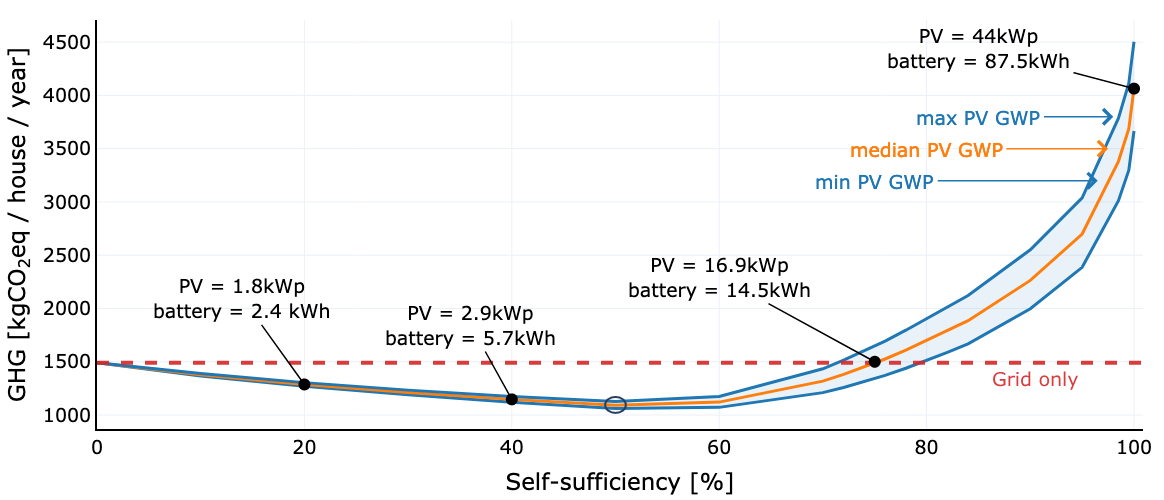

In [24]:
mask = (df.cluster_file == "../../data/clustered_data_DE.pickle") & (df.name == "country envelope")

graph = df[mask].copy()
graph["text"] = graph.apply(lambda x: f"{x.pv_kw_house}kWp/house — {round(np.mean(x.battery_kwh_house), 2)}kWh/house", axis=1)
graph = graph.sort_values(["pv_gwp", "self_sufficiency"])
graph["self_sufficiency"] *= 100

fig = px.line(graph, x="self_sufficiency", y="total_not_discounted_kgco2_house_year", color="pv_gwp", hover_data=["text"])

fig.data[0].update({"line": {"width": 3, "color": '#1f77b4'}, "opacity": 0.8})
fig.data[1].update({"line": {"width": 3, "color": '#ff7f0e'}, "opacity": 0.8, "fill": "tonexty", "fillcolor": "rgba(55, 128, 191, 0.1)"})
fig.data[-1].update({"line": {"width": 3, "color": '#1f77b4'}, "opacity": 0.8, "fill": "tonexty", "fillcolor": "rgba(55, 128, 191, 0.1)"})

fig.add_shape(
  type='line',
  xref="paper",
  x0=0, x1=1,
  y0=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  y1=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  line={'dash': 'dash', 'width': 4,
        'color': 'rgba(214, 39, 40, 0.9)'})

#fig.add_annotation(
#  x=27,
#  y=4500,
#  ay=0,
#  text=f"""Residential sector in Germany""",
#  font={"color": "black", 'size': 25})

fig.add_annotation(
  x=91.5,
  y=1350,
  ay=0,
  text=f"""Grid only""",
  font={"color": "rgba(214, 39, 40, 0.9)", 'size': 19})

fig.add_annotation(
  x=98,
  y=3800,
  ay=3800,
  text=f"""max PV GWP""",
  font={"color": "#1f77b4", 'size': 19},
  arrowhead=4, arrowsize=2, ax=85, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#1f77b4")

fig.add_annotation(
  x=97.5,
  y=3500,
  ay=3500,
  text=f"""median PV GWP""",
  font={"color": "#ff7f0e", 'size': 19},
  arrowhead=4, arrowsize=2, ax=80, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#ff7f0e")

fig.add_annotation(
  x=96.5,
  y=3200,
  ay=3200,
  text=f"""min PV GWP""",
  font={"color": "#1f77b4", 'size': 19},
  arrowhead=4, arrowsize=2, ax=75, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#1f77b4")

fig.add_annotation(
  x=20,
  y=1287,
  ay=2100,
  text=f"""PV = 1.8kWp<br>battery = 2.4 kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, ax=14, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_annotation(
  x=40,
  y=1147,
  ay=1850,
  text=f"""PV = 2.9kWp<br>battery = 5.7kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, ax=36, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_annotation(
  x=100,
  y=4064,
  ax=85,
  ay=4450,  
  text=f"""PV = 44kWp<br>battery = 87.5kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_annotation(
  x=75,
  y=1500,
  ax=60,
  ay=2300,  
  text=f"""PV = 16.9kWp<br>battery = 14.5kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_shape(
  type="circle",
  x0=49, x1=51,
  y0=1020, y1=1170)

fig.update_layout(
    layout,
    height=500,
    width=900,
    showlegend=False,
    xaxis={"title": "Self-sufficiency [%]",
           "showline": True, "linecolor": "black", "linewidth": 2},
    yaxis={"title": "GHG [kgCO<sub>2</sub>eq / house / year]",
           "showline": True, "linecolor": "black", "linewidth": 2})
fig.show()

In [25]:
fig.write_image("zoomed_out_germany_envelope.pdf")
fig.write_html("zoomed_out_germany_envelope.html")

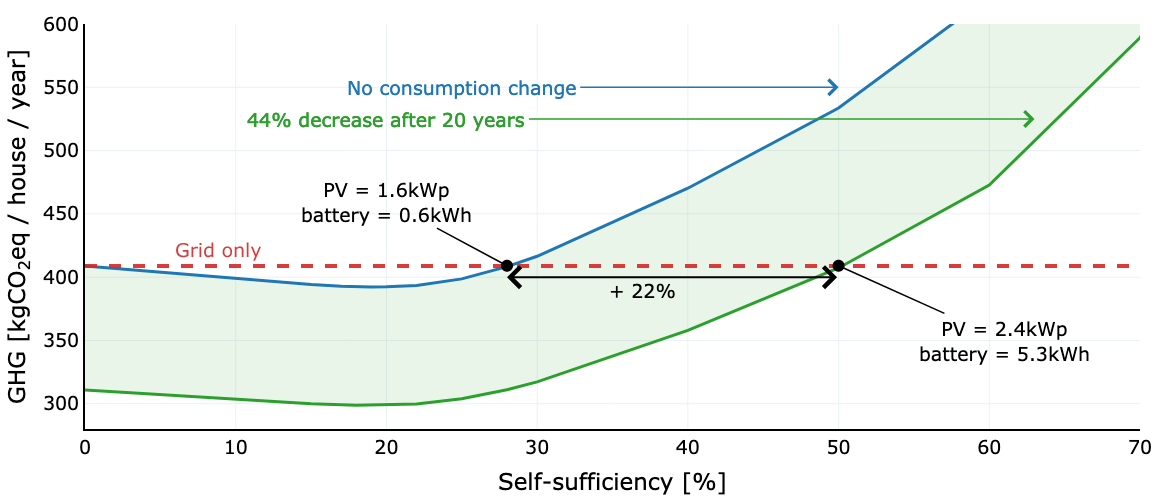

In [26]:
mask = (df.cluster_file == "../../data/clustered_data_FR.pickle") & (df.pv_gwp == 1040)

graph = df[mask].copy()
graph["text"] = graph.apply(lambda x: f"{x.pv_kw_house}kWp/house — {round(np.mean(x.battery_kwh_house), 2)}kWh/house", axis=1)
graph = graph.sort_values(["pv_gwp", "self_sufficiency"])
graph["self_sufficiency"] *= 100

fig = px.line(graph, x="self_sufficiency", y="total_not_discounted_kgco2_house_year", color="positive_feedback", hover_data=["text"])

fig.data[0].update({"line": {"width": 3, "color": '#1f77b4'}, "opacity": 0.8})
fig.data[1].update({"line": {"width": 3, "color": 'rgba(44, 160, 44, 1.0)'}, "opacity": 0.8,
                    "fill": "tonexty", "fillcolor": "rgba(44, 160, 44, 0.1)"})

fig.add_shape(
  type='line',
  xref="paper",
  x0=0, x1=1,
  y0=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  y1=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  line={'dash': 'dash', 'width': 4,
        'color': 'rgba(214, 39, 40, 0.9)'})

#fig.add_annotation(
#  x=17.6,
#  y=600,
#  ay=0,
#  text=f"""Residential sector in France""",
#  font={"color": "black", 'size': 25})

fig.add_annotation(
  x=9.5,
  y=422,
  ay=0,
  text=f"""Grid only""",
  font={"color": "rgba(214, 39, 40, 0.9)", 'size': 19})

fig.add_annotation(
  x=50,
  y=550,
  ay=550,
  text=f"""No consumption change""",
  font={"color": "#1f77b4", 'size': 19},
  arrowhead=4, arrowsize=2, ax=25, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#1f77b4")

fig.add_annotation(
  x=63,
  y=525,
  ay=525,
  text=f"""44% decrease after 20 years""",
  font={"color": "rgba(44, 160, 44, 1.0)", 'size': 19},
  arrowhead=4, arrowsize=2, ax=20, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="rgba(44, 160, 44, 1.0)")

fig.add_annotation(
  x=28,
  y=400,
  ax=50,
  ay=400,  
  text=f"""""",
  font={"color": "black", 'size': 19},
  arrowhead=4, arrowsize=2, arrowwidth=2, ayref="y", axref="x", arrowcolor="black", arrowside="start+end")
fig.add_annotation(
  x=37,
  y=390,
  ax=37,
  ay=390,
  text=f"""+ 22%""",
  font={"color": "black", 'size': 19},
  arrowhead=4, arrowsize=2,  arrowwidth=1.5, ayref="y", axref="x", arrowcolor="rgba(44, 160, 44, 1.0)")

fig.add_annotation(
  x=28,
  y=409,
  ax=20,
  ay=460,
  text=f"""PV = 1.6kWp<br>battery = 0.6kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_annotation(
  x=50,
  y=409,
  ax=61,
  ay=350,    
  text=f"""PV = 2.4kWp<br>battery = 5.3kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.update_layout(
    layout,
    height=500,
    width=900,
    showlegend=False,
    xaxis={"title": "Self-sufficiency [%]",
           "showline": True, "linecolor": "black", "linewidth": 2, "range": [0, 70]},
    yaxis={"title": "GHG [kgCO<sub>2</sub>eq / house / year]",
           "showline": True, "linecolor": "black", "linewidth": 2, "range": [280, 600]})
fig.show()

In [27]:
fig.write_image("zoomed_in_france_feedback.pdf")
fig.write_html("zoomed_in_france_feedback.html")

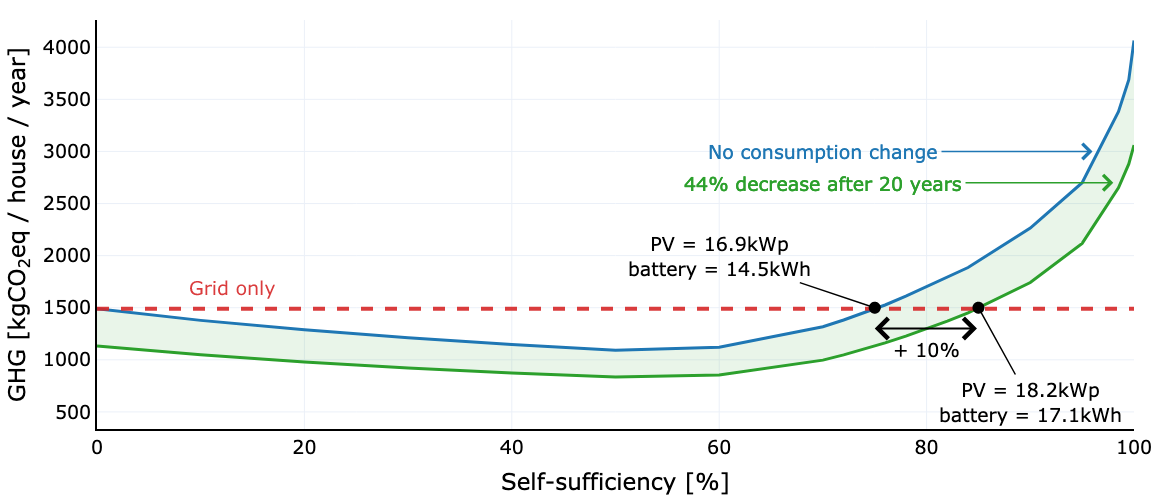

In [28]:
mask = (df.cluster_file == "../../data/clustered_data_DE.pickle") & (df.pv_gwp == 1040)

graph = df[mask].copy()
graph["text"] = graph.apply(lambda x: f"{x.pv_kw_house}kWp/house — {round(np.mean(x.battery_kwh_house), 2)}kWh/house", axis=1)
graph = graph.sort_values(["pv_gwp", "self_sufficiency"])
graph["self_sufficiency"] *= 100

fig = px.line(graph, x="self_sufficiency", y="total_not_discounted_kgco2_house_year", color="positive_feedback", hover_data=["text"])

fig.data[0].update({"line": {"width": 3, "color": '#1f77b4'}, "opacity": 0.8})
fig.data[1].update({"line": {"width": 3, "color": 'rgba(44, 160, 44, 1.0)'}, "opacity": 0.8,
                    "fill": "tonexty", "fillcolor": "rgba(44, 160, 44, 0.1)"})

fig.add_shape(
  type='line',
  xref="paper",
  x0=0, x1=1,
  y0=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  y1=graph.iloc[0]["total_not_discounted_kgco2_house_year"],
  line={'dash': 'dash', 'width': 4,
        'color': 'rgba(214, 39, 40, 0.9)'})

#fig.add_annotation(
#  x=27,
#  y=4000,
#  ay=0,
#  text=f"""Residential sector in Germany""",
#  font={"color": "black", 'size': 25})

fig.add_annotation(
  x=14,
  y=1700,
  ay=0,
  text=f"""Grid only""",
  font={"color": "rgba(214, 39, 40, 0.9)", 'size': 19})

fig.add_annotation(
  x=96,
  y=3000,
  ay=3000,
  text=f"""No consumption change""",
  font={"color": "#1f77b4", 'size': 19},
  arrowhead=4, arrowsize=2, ax=70, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="#1f77b4")

fig.add_annotation(
  x=98,
  y=2700,
  ay=2700,
  text=f"""44% decrease after 20 years""",
  font={"color": "rgba(44, 160, 44, 1.0)", 'size': 19},
  arrowhead=4, arrowsize=2, ax=70, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="rgba(44, 160, 44, 1.0)")

fig.add_annotation(
  x=75,
  y=1300,
  ax=85,
  ay=1300, 
  text=f"""""",
  font={"color": "black", 'size': 19},
  arrowhead=4, arrowsize=2, arrowwidth=2, ayref="y", axref="x", arrowcolor="black", arrowside="start+end")
fig.add_annotation(
  x=80,
  y=1100,
  ax=80,
  ay=1100,
  text=f"""+ 10%""",
  font={"color": "black", 'size': 19},
  arrowhead=4, arrowsize=2,  arrowwidth=1.5, ayref="y", axref="x", arrowcolor="rgba(44, 160, 44, 1.0)")

fig.add_annotation(
  x=75,
  y=1500,
  ax=60,
  ay=2000,
  text=f"""PV = 16.9kWp<br>battery = 14.5kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.add_annotation(
  x=85,
  y=1500,
  ax=90,
  ay=600,    
  text=f"""PV = 18.2kWp<br>battery = 17.1kWh""",
  font={"color": "black", 'size': 19},
  arrowhead=6, arrowsize=2, arrowwidth=1.5, ayref="y", axref="x", arrowcolor="black")

fig.update_layout(
    layout,
    height=500,
    width=900,
    showlegend=False,
    xaxis={"title": "Self-sufficiency [%]",
           "showline": True, "linecolor": "black", "linewidth": 2},
    yaxis={"title": "GHG [kgCO<sub>2</sub>eq / house / year]",
           "showline": True, "linecolor": "black", "linewidth": 2})
fig.show()

In [29]:
fig.write_image("zoomed_out_germany_feedback.pdf")
fig.write_html("zoomed_out_germany_feedback.html")

In [30]:
fig = px.line(dfresult[['co2_kg_house_year', 'capex']])
fig.data[0].update({'line' : {'width': 5}, 'name': 'OPEX + CAPEX'})
fig.data[1].update({'line' : {'width': 5}, 'name': 'CAPEX', 'fill': 'tonexty'})
fig.update_layout(
    layout,
    showlegend=True,
    xaxis={'title': 'Self-sufficiency [%]'},
    yaxis={'title': 'kgCO2eq / house / year'})
fig.show()

NameError: name 'dfresult' is not defined